<a href="https://colab.research.google.com/github/ImeCMR/Maze-Robot/blob/main/Maze_Robot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

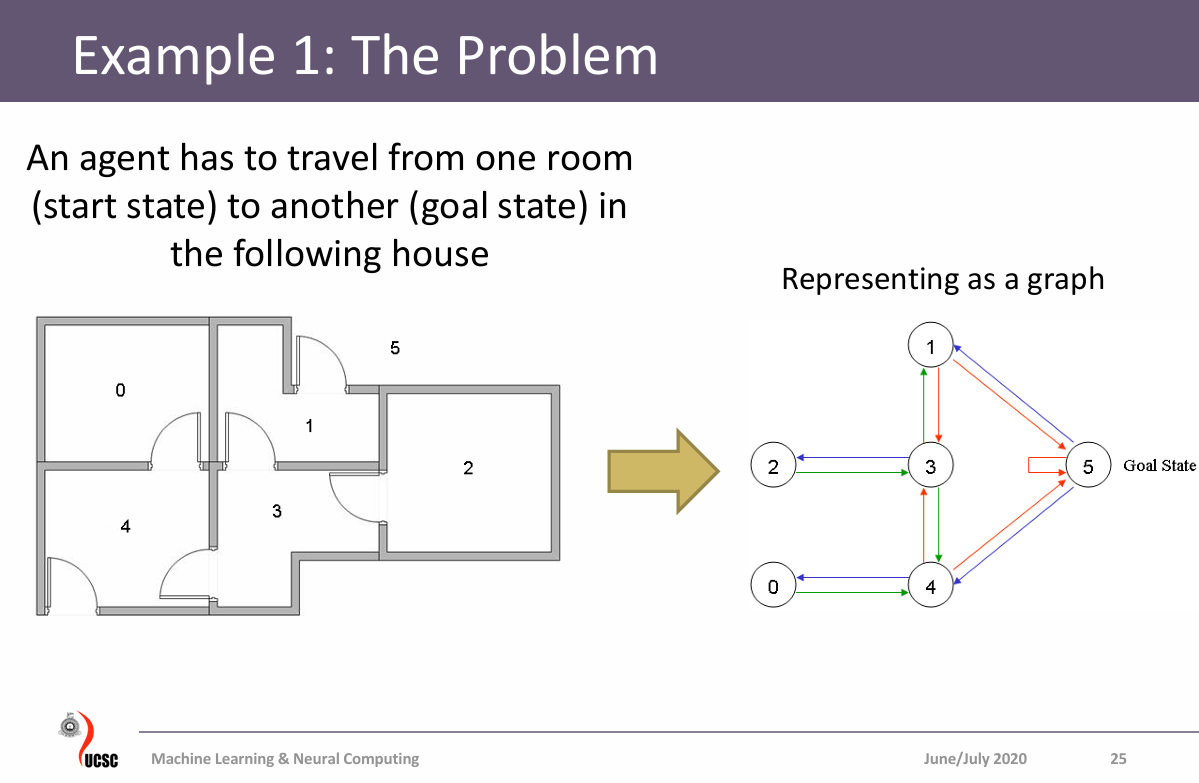

Import libraries

In [19]:
import numpy as np
import pylab as plt

Map cell to cell, add circular cell to goal point

In [20]:
points_list = [(0,4), (4,3), (2,3), (3,1), (1,5),(4,5)]                           #defining connections


Setting the goal and starting points and plot the graph

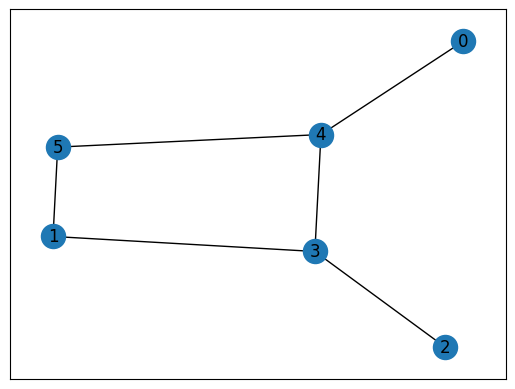

In [21]:
goal = 5

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()


How many points in graph? x points

In [22]:
MATRIX_SIZE = 6                                                                 #using the number of points

Create matrix x*y

In [23]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))                        #create a matrix with zeros
R *= -1                                                                         #multiply the matrix by 1
R

matrix([[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]])

Assign zeros to paths and 100 to goal-reaching point

In [24]:
for point in points_list:                                                       #going through the all points in points_list
    print(point)                                                                #(state,action)
    if point[1] == goal:                                                        #check whether the action(1) of the point is equalt to goal
        R[point] = 100                                                          #update the point in R matrix
    else:
        R[point] = 0                                                            #tells whether there's an connection and update the R matrix

    if point[0] == goal:                                                        #check whether the state(0) of the point is equalt to goal
        R[point[::-1]] = 100                                                    #takeing the inverse of the point : (action,state) and update the R metrix----> (7,2) becomes (2,7)
    else:
         # reverse of point
        R[point[::-1]]= 0                                                       #tells whether there's an connection and update the R matrix


R[goal,goal]= 100                                                               #add goal point round trip (goal to goal)

R


(0, 4)
(4, 3)
(2, 3)
(3, 1)
(1, 5)
(4, 5)


matrix([[ -1.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.],
        [  0.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,   0., 100.]])

Building the Q table

In [25]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))                              #crate a Q matrix with zeros


gamma = 0.8                                                                     # define learning parameter

initial_state = 1

def available_actions(state):                                                   #taking a state
    current_state_row = R[state,]                                               #taking all values of the state of the R matrix (raw)
    av_act = np.where(current_state_row >= 0)[1]                                #taking all actions in the raw which is >= 0 ------> movements
                                                                                #[1] is used to prevernt getting array[0,0]
    return av_act

available_act = available_actions(initial_state)                                #assign available actions to avalable_act




def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))                        #taking a one number randomly from available actions as the next action
    return next_action

action = sample_next_action(available_act)                                      #assign the taken number as the nest action




def update(current_state, action, gamma):                                       #update the values

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]                     #taking then maximum values from the raw of actions from Q table

  if max_index.shape[0] > 1:                                                    #runs when there are more than one maximum numbers in max_index
      max_index = int(np.random.choice(max_index, size = 1))                    #select a value as a integer from max_index randomly
  else:                                                                         #runs when there is no more than one maximum numbers
      max_index = int(max_index)                                                #making the maximum number an interger and assign it inti max_index again
  max_value = Q[action, max_index]                                              #define the maximum value from the Q table into max_value

  Q[current_state, action] = R[current_state, action] + gamma * max_value       #taking values to fill the Q table
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)


max_value 0.0


<ipython-input-25-c6df083792d6>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))                        #taking a one number randomly from available actions as the next action
<ipython-input-25-c6df083792d6>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))                    #select a value as a integer from max_index randomly


0

Training

In [26]:
scores = []
for i in range(700):                                                            #runtimes
    current_state = np.random.randint(0, int(Q.shape[0]))                       #taking a number randomly from Q matrix
    available_act = available_actions(current_state)                            #call available_actions funtion defined in the above code and assign values into available_act
    action = sample_next_action(available_act)                                  #taking an action by calling sample_next_action defined in above code and assign it into action

    score = update(current_state,action,gamma)                                  #updating the Q matrix
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)


max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 80.0
Score: 180.0
max_value 100.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 64.0
Score: 244.0
max_value 80.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 64.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 0.0
Score: 244.0
max_value 100.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 100.0
Score: 444.0
max_value 0.0
Score: 444.0
max_value 180.0
Score: 291.11111111111114
max_value 144.0
Score: 371.1111111111111
max_value 144.0
Score: 451.1111111111111
max_value 115.2
Score: 515.1111111111111
max_value 115.2
Score: 515.1111111111111
max_value 215.2
Score: 447.2118959107807
max_value 172.16
Score: 460.29739776951675
max_value 172.16
Score: 460.29739776951675
max_value 80.0
Score: 497.47211895910783
max_value 237.728
S

<ipython-input-25-c6df083792d6>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))                        #taking a one number randomly from available actions as the next action
<ipython-input-25-c6df083792d6>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))                    #select a value as a integer from max_index randomly
<ipython-input-25-c6df083792d6>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before pe

 191.02654005248007
Score: 898.1401085304745
max_value 278.4169856335873
Score: 907.2507734943192
max_value 348.0212320419841
Score: 907.2507734943192
max_value 348.0212320419841
Score: 907.2507734943192
max_value 348.0212320419841
Score: 907.2507734943192
max_value 278.4169856335873
Score: 936.2768337476441
max_value 278.4169856335873
Score: 936.2768337476441
max_value 435.0265400524801
Score: 940.010712831187
max_value 298.4789688320001
Score: 940.010712831187
max_value 448.0212320419841
Score: 929.4690303346879
max_value 448.0212320419841
Score: 932.3694937636815
max_value 278.4169856335873
Score: 932.3694937636815
max_value 278.4169856335873
Score: 945.747881329914
max_value 348.0212320419841
Score: 945.747881329914
max_value 348.0212320419841
Score: 945.747881329914
max_value 278.4169856335873
Score: 945.747881329914
max_value 278.4169856335873
Score: 945.747881329914
max_value 278.4169856335873
Score: 945.747881329914
max_value 348.0212320419841
Score: 945.747881329914
max_value 

Testing

Most efficient path:
[2, 3, 1, 5]


<ipython-input-27-53b13e7cf31e>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


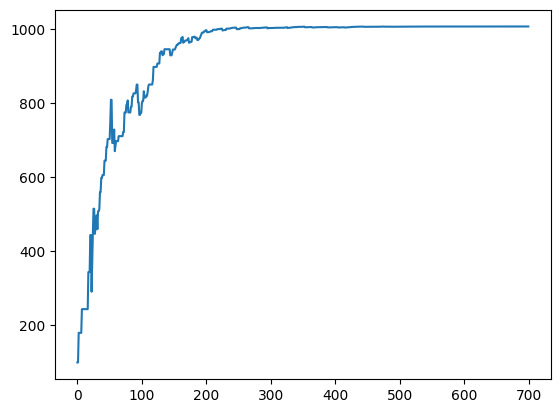

In [27]:
current_state = 2                                                               #starting point
steps = [current_state]                                                         #defining steps variable and equal it into currrent_state

while current_state != 5:                                                       #runs while current state is not equal to goal

    next_step_index = np.where(Q[current_state,]                                #taking the maximum value from the sctions in the current state's raw and assign
                                                                                #it into nest_step_index
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:                                            #check whether there are more than one maximum numbers
        next_step_index = int(np.random.choice(next_step_index, size = 1))      #taking a random value from the values in next_step_index

    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)                                               #adding next_step_index into steps variable
    current_state = next_step_index                                             #assign next_step_index as the current_state

print("Most efficient path:")
print(steps)                                                                    #prints the shortest path

plt.plot(scores)
plt.show()
